In [1]:
import csv
import nltk

# Initialize variables: The original dataset contains one token per line.
# For tagging, we need to process it sentence by sentence
original_dataset = []
dataset_for_tagging =[]

# Path to the CoNLL file and to the new output
#### Make sure to do this with both: the training and the test file!!! ###

# path_conll = "/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap.txt"

# path_conll_nltk_tags ='/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap_nltktags.txt'

path_conll = "/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap.txt"

path_conll_nltk_tags ='/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap_nltktags.txt'

with (open(path_conll)) as f:
    csv_file = csv.reader(f, delimiter='\t', quotechar=None)

    # For each sentence, we want to store the following information:
    # words, pos-tags (from the MBT Tagger), ne-labels
    words, mbt_tags, labels = [], [], []

    for idx, row in enumerate(csv_file):
        # Keep all lines unchanged here
        original_dataset.append(row)

        # Empty rows indicate sentence boundaries. We add the collected information to the dataset
        if len(row) == 0:

            # Make sure that everything has the same length
            assert len(words) == len(mbt_tags) == len(labels)

            # Add the information for the current sentence to the dataset
            # Each sentence is a tuple of words, tags, and labels
            dataset_for_tagging.append((words, mbt_tags, labels))

            # Re-initialize the variables
            words, mbt_tags, labels = [], [], []

        else:
            word, previous, casing, pos, chunk, label = row
            word = str(row[0])
            mbt_tag = str(row[3])
            label = str(row[5])

            words.append(word)
            mbt_tags.append(pos)
            labels.append(label)

# The last empty line is not processed by the reader, so we need to add the last sentence here.
if not len(words) == 0:
    dataset_for_tagging.append((words, mbt_tags, labels))

##### Your work starts HERE ####

# Initialize some counting variables

differnet_pos = 0

differentlist=[]
wordslist = []
all_nltk_tags =[]

for sentence in dataset_for_tagging:
    # Split the tuple into the different categories
    words, mbt_tags, labels = sentence

    # Get the new POS-tags
    # The POS-tagger outputs a list of tuples [(word, POS-tag),...]
    nltk_output = nltk.pos_tag(words)
    # We only want to extract the tags
    nltk_tags = [tag for word, tag in nltk_output]
    all_nltk_tags.append(nltk_tags)

    # Now do your analysis on the words and the tags
    # Make sure to ignore the word "-DOCSTART-" because it just indicates document boundaries
    for i in range(len(mbt_tags)):
        if mbt_tags[i] == '-X-':
            continue
        else:
            if mbt_tags[i] != nltk_tags[i]:
                differentlist.append((mbt_tags[i],nltk_tags[i]))
                wordslist.append(words[i])
                differnet_pos +=1
            
    




#### Output your results here: ####

print(differnet_pos)

# Now, let's output the CoNLL data with the output for the POS column replaced with the nltk tags
with (open(path_conll_nltk_tags, "w")) as outfile:
    # Initialize ids
    sentence_id = 0
    word_id = 0

    for row in original_dataset:
        # Add a new line after each sentence
        if len(row) == 0:
            outfile.write("\n")

            # update variables
            sentence_id += 1
            word_id = 0

        else:
            # Do not change the tag for document boundaries
            if word == "-DOCSTART-":
                outfile.write("\t".join(row))
                outfile.write("\n")

            # Replace the tag for all other tokens
            else:
                new_row = [x for x in row]

                nltk_tag = all_nltk_tags[sentence_id][word_id]
                new_row[3] = nltk_tag

                outfile.write("\t".join(new_row))
                outfile.write("\n")

            word_id += 1





19465


In [43]:
cs.Counter(differentlist)

Counter({('NNP', 'JJ'): 731,
         ('NN', 'NNS'): 240,
         ('NN', 'JJ'): 748,
         ('NN', 'VB'): 149,
         ('"', 'NN'): 869,
         ('"', 'VBZ'): 55,
         ('NNP', 'NN'): 661,
         ('FW', 'NN'): 54,
         ('JJ', 'RBR'): 3,
         ('JJR', 'NNP'): 40,
         ('VBN', 'VBD'): 420,
         ('VBZ', 'NNS'): 300,
         ('WDT', 'IN'): 18,
         ('VB', 'NN'): 325,
         ('VBD', 'VBN'): 380,
         ('RB', 'EX'): 11,
         ('NNP', 'FW'): 24,
         ('JJ', 'NNP'): 962,
         ('"', 'NNP'): 519,
         ('JJ', 'NN'): 673,
         ('NNP', 'RB'): 54,
         ('NNS', 'VB'): 6,
         ('"', 'VB'): 232,
         ('JJ', 'VB'): 35,
         ('CD', 'JJ'): 1836,
         ('VBZ', 'NNP'): 60,
         ('DT', 'VBD'): 3,
         ('VBD', 'NN'): 65,
         ('NN', 'RB'): 63,
         ('VBG', 'NNP'): 98,
         ('NNP', 'VB'): 16,
         ('JJ', 'RB'): 115,
         ('RB', 'JJ'): 132,
         ('NNP', 'NNS'): 156,
         ('JJ', 'VBG'): 90,
         ('WDT

In [46]:
cs.Counter(wordslist)

Counter({'European': 27,
         'lamb': 1,
         'cow': 5,
         'sheep': 6,
         '"': 2178,
         'van': 17,
         'der': 9,
         'further': 12,
         'Fischler': 1,
         'proposed': 2,
         'measures': 1,
         'that': 85,
         'contract': 4,
         'animal': 5,
         'questioned': 2,
         'there': 14,
         'Spanish': 8,
         'de': 33,
         'EU': 3,
         'veterinary': 1,
         'Sheep': 2,
         'cattle': 3,
         'denied': 1,
         'collapsed': 2,
         'mad': 2,
         '1996-08-22': 103,
         'handwritten': 1,
         'Ai': 4,
         'no': 8,
         'penned': 1,
         'English': 24,
         'inlaid': 1,
         'overdose': 1,
         'aged': 5,
         'spoils': 1,
         'atmosphere': 1,
         'BEIJING': 9,
         'Ukraine': 3,
         'Taiwanese': 2,
         'only': 11,
         'right': 11,
         'Reuters': 39,
         'visiting': 2,
         'People': 4,
         'Daily

In [36]:
# original_dataset_nltk = []
# dataset_for_tagging_nltk =[]
# path_conll_nltk_tags ='/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap.txt'
# with (open(path_conll_nltk_tags)) as f:
#     csv_file = csv.reader(f, delimiter='\t', quotechar=None)

#     # For each sentence, we want to store the following information:
#     # words, pos-tags (from the MBT Tagger), ne-labels
#     words, mbt_tags, labels = [], [], []

#     for idx, row in enumerate(csv_file):
#         # Keep all lines unchanged here
#         original_dataset_nltk.append(row)

#         # Empty rows indicate sentence boundaries. We add the collected information to the dataset
#         if len(row) == 0:

#             # Make sure that everything has the same length
#             assert len(words) == len(mbt_tags) == len(labels)

#             # Add the information for the current sentence to the dataset
#             # Each sentence is a tuple of words, tags, and labels
#             dataset_for_tagging_nltk.append((words, mbt_tags, labels))

#             # Re-initialize the variables
#             words, mbt_tags, labels = [], [], []

#         else:
#             word, previous, casing, pos, chunk, label = row
#             word = str(row[0])
#             mbt_tag = str(row[3])
#             label = str(row[5])

#             words.append(word)
#             mbt_tags.append(pos)
#             labels.append(label)

# # The last empty line is not processed by the reader, so we need to add the last sentence here.
# if not len(words) == 0:
#     dataset_for_tagging_nltk.append((words, mbt_tags, labels))

In [37]:
# differnet_pos = 0
# differnet_label = 0
# different_both = 0
# NNP_=0
# NNP_nltk=0
# number_different = []
# for index,sentence in enumerate(dataset_for_tagging):
#     # Split the tuple into the different categories
#     _, mbt_tags, labels = dataset_for_tagging[index]
#     _, mbt_tags_nltk, labels_nltk = dataset_for_tagging_nltk[index]
# #     print(mbt_tags,mbt_tags_nltk)
#     for i in range(len(mbt_tags)):
#         if mbt_tags[i] != mbt_tags_nltk[i]:
#             print('1')
#             number_different.append((mbt_tags[i],mbt_tags_nltk[i]))
# #         if labels[i] != labels_nltk[i]:
# #             differnet_label+=1
# #         if mbt_tags[i] != mbt_tags_nltk[i] and labels[i] != labels_nltk[i]:
# #             different_both +=1
#         if mbt_tags[i]=='NNP':
#             NNP_+=1
#         if mbt_tags_nltk[i]=='NNP':
#             NNP_nltk+=1
            
            

# part3

In [8]:
import collections as cs
import sklearn
import csv
import gensim
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
trainfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap_nltktags.txt'
testfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap_nltktags.txt'

# the functions with multiple features and analysis

#defines the column in which each feature is located (note: you can also define headers and use csv.DictReader)
feature_to_index = {'Token': 0, 'Prevtoken': 1, 'Cap': 2, 'Pos': 3, 'Chunklabel': 4}

def extract_features_token_only_and_labels(conllfile):
    '''Function that extracts features and gold label from preprocessed conll (here: tokens only).
    
    :param conllfile: path to the (preprocessed) conll file
    :type conllfile: string
    
    
    :return features: a list of dictionaries, with key-value pair providing the value for the feature `token' for individual instances
    :return labels: a list of gold labels of individual instances
    '''
    
    features = []
    labels = []
    conllinput = open(conllfile, 'r')
    #delimiter indicates we are working with a tab separated value (default is comma)
    #quotechar has as default value '"', which is used to indicate the borders of a cell containing longer pieces of text
    #in this file, we have only one token as text, but this token can be '"', which then messes up the format. We set quotechar to a character that does not occur in our file
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        #I preprocessed the file so that all rows with instances should contain 6 values, the others are empty lines indicating the beginning of a sentence
        if len(row) == 6:
            #structuring feature value pairs as key-value pairs in a dictionary
            #the first column in the conll file represents tokens
            feature_value = {'Token': row[0]}
            features.append(feature_value)
            #The last column provides the gold label (= the correct answer). 
            labels.append(row[-1])
    
    return features, labels



def create_vectorizer_and_classifier(features, labels):
    '''
    Function that takes feature-value pairs and gold labels as input and trains a logistic regression classifier
    
    :param features: feature-value pairs
    :param labels: gold labels
    :type features: a list of dictionaries
    :type labels: a list of strings
    
    :return lr_classifier: a trained LogisticRegression classifier
    :return vec: a DictVectorizer to which the feature values are fitted. 
    '''
    
    vec = DictVectorizer()
    #fit creates a mapping between observed feature values and dimensions in a one-hot vector, transform represents the current values as a vector 
    tokens_vectorized = vec.fit_transform(features)
    lr_classifier = LogisticRegression(solver='saga')
    lr_classifier.fit(tokens_vectorized, labels)
    
    return lr_classifier, vec

def get_predicted_and_gold_labels_token_only(testfile, vectorizer, classifier):
    '''
    Function that extracts features and runs classifier on a test file returning predicted and gold labels
    
    :param testfile: path to the (preprocessed) test file
    :param vectorizer: vectorizer in which the mapping between feature values and dimensions is stored
    :param classifier: the trained classifier
    :type testfile: string
    :type vectorizer: DictVectorizer
    :type classifier: LogisticRegression()
    
    
    
    :return predictions: list of output labels provided by the classifier on the test file
    :return goldlabels: list of gold labels as included in the test file
    '''
    
    #we use the same function as above (guarantees features have the same name and form)
    sparse_feature_reps, goldlabels = extract_features_token_only_and_labels(testfile)
    #we need to use the same fitting as before, so now we only transform the current features according to this mapping (using only transform)
    test_features_vectorized = vectorizer.transform(sparse_feature_reps)
    predictions = classifier.predict(test_features_vectorized)
    
    return predictions, goldlabels

def print_confusion_matrix(predictions, goldlabels):
    '''
    Function that prints out a confusion matrix
    
    :param predictions: predicted labels
    :param goldlabels: gold standard labels
    :type predictions, goldlabels: list of strings
    '''
    
    
    
    #based on example from https://datatofish.com/confusion-matrix-python/ 
    data = {'Gold':    goldlabels, 'Predicted': predictions    }
    df = pd.DataFrame(data, columns=['Gold','Predicted'])

    confusion_matrix = pd.crosstab(df['Gold'], df['Predicted'], rownames=['Gold'], colnames=['Predicted'])
    print (confusion_matrix)


def print_precision_recall_fscore(predictions, goldlabels):
    '''
    Function that prints out precision, recall and f-score
    
    :param predictions: predicted output by classifier
    :param goldlabels: original gold labels
    :type predictions, goldlabels: list of strings
    '''
    
    precision = metrics.precision_score(y_true=goldlabels,
                        y_pred=predictions,average='macro')

    recall = metrics.recall_score(y_true=goldlabels,
                     y_pred=predictions,average='macro')


    fscore = metrics.f1_score(y_true=goldlabels,
                 y_pred=predictions,average='macro')

    print('P:', precision, 'R:', recall, 'F1:', fscore)

def extract_features_and_gold_labels(conllfile, selected_features):
    '''Function that extracts features and gold label from preprocessed conll (here: tokens only).
    
    :param conllfile: path to the (preprocessed) conll file
    :type conllfile: string
    
    
    :return features: a list of dictionaries, with key-value pair providing the value for the feature `token' for individual instances
    :return labels: a list of gold labels of individual instances
    '''
    
    features = []
    labels = []
    conllinput = open(conllfile, 'r')
    #delimiter indicates we are working with a tab separated value (default is comma)
    #quotechar has as default value '"', which is used to indicate the borders of a cell containing longer pieces of text
    #in this file, we have only one token as text, but this token can be '"', which then messes up the format. We set quotechar to a character that does not occur in our file
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        #I preprocessed the file so that all rows with instances should contain 6 values, the others are empty lines indicating the beginning of a sentence
        if len(row) == 6:
            #structuring feature value pairs as key-value pairs in a dictionary
            #the first column in the conll file represents tokens
            feature_value = {}
            for feature_name in selected_features:
                row_index = feature_to_index.get(feature_name)
                feature_value[feature_name] = row[row_index]
            features.append(feature_value)
            #The last column provides the gold label (= the correct answer). 
            labels.append(row[-1])
    return features, labels

def get_predicted_and_gold_labels(testfile, vectorizer, classifier, selected_features):
    '''
    Function that extracts features and runs classifier on a test file returning predicted and gold labels
    
    :param testfile: path to the (preprocessed) test file
    :param vectorizer: vectorizer in which the mapping between feature values and dimensions is stored
    :param classifier: the trained classifier
    :type testfile: string
    :type vectorizer: DictVectorizer
    :type classifier: LogisticRegression()
    
    
    
    :return predictions: list of output labels provided by the classifier on the test file
    :return goldlabels: list of gold labels as included in the test file
    '''
    
    #we use the same function as above (guarantees features have the same name and form)
    features, goldlabels = extract_features_and_gold_labels(testfile, selected_features)
    #we need to use the same fitting as before, so now we only transform the current features according to this mapping (using only transform)
    test_features_vectorized = vectorizer.transform(features)
    predictions = classifier.predict(test_features_vectorized)
    
    return predictions, goldlabels



In [5]:
#define which from the available features will be used (names must match key names of dictionary feature_to_index)
all_features = ['Token','Prevtoken','Cap','Pos','Chunklabel']

sparse_feature_reps, labels = extract_features_and_gold_labels(trainfile, all_features)
#we can use the same function as before for creating the classifier and vectorizer
lr_classifier, vectorizer = create_vectorizer_and_classifier(sparse_feature_reps, labels)
#when applying our model to new data, we need to use the same features
predictions, goldlabels = get_predicted_and_gold_labels(testfile, vectorizer, lr_classifier, all_features)
print_confusion_matrix(predictions, goldlabels)

Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER      O
Gold                                                                      
B-LOC       1358      10    134     77      1       1      6     41     40
B-MISC        27     449     56     48      0       1      6     26     89
B-ORG        188      44   1021    175      1       1     25     63    143
B-PER         75      11     43   1276      0       0      1    140     71
I-LOC          4       0      0      0    158       4     36     32     23
I-MISC         1       8      0      3      2     130     10     25     37
I-ORG         24       7      6     11     46       8    513    112    108
I-PER          1       0      0     14      1       0     14   1105     21
O             34      34     78    107      3      38     35    106  38119


In [6]:
print_precision_recall_fscore(predictions, goldlabels)

P: 0.7783661674293809 R: 0.7370182212511502 F1: 0.7504892659594187


# 2.3 word embedding

In [9]:
word_embedding_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/hernando/Desktop/NLP/Assignment2/NLP_tech_distributional_semantics/models/GoogleNews-vectors-negative300.bin.gz', binary=True)  


In [12]:
trainfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap_nltktags.txt'
testfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap_nltktags.txt'

def extract_embeddings_as_features_and_gold(conllfile,word_embedding_model):
    '''
    Function that extracts features and gold labels using word embeddings
    
    :param conllfile: path to conll file
    :param word_embedding_model: a pretrained word embedding model
    :type conllfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :return features: list of vector representation of tokens
    :return labels: list of gold labels
    '''
    labels = []
    features = []
    
    conllinput = open(conllfile, 'r')
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        if len(row) == 6:
            if row[0] in word_embedding_model:
                vector = word_embedding_model[row[0]]
            else:
                vector = [0]*300
            features.append(vector)
            labels.append(row[-1])
    return features, labels

def create_classifier(features, labels):
    '''
    Function that creates classifier from features represented as vectors and gold labels
    
    :param features: list of vector representations of tokens
    :param labels: list of gold labels
    :type features: list of vectors
    :type labels: list of strings
    
    :returns trained logistic regression classifier
    '''
    
    
    lr_classifier = LogisticRegression(solver='saga')
    lr_classifier.fit(features, labels)
    
    return lr_classifier
    
    
def label_data_using_word_embeddings(testfile, word_embedding_model, classifier):
    '''
    Function that extracts word embeddings as features and gold labels from test data and runs a classifier
    
    :param testfile: path to test file
    :param word_embedding_model: distributional semantic model
    :param classifier: trained classifier
    :type testfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    :type classifier: LogisticRegression
    
    :return predictions: list of predicted labels
    :return labels: list of gold labels
    '''
    
    dense_feature_representations, labels = extract_embeddings_as_features_and_gold(testfile,word_embedding_model)
    predictions = classifier.predict(dense_feature_representations)
    
    return predictions, labels

print('Extracting dense features...')
dense_feature_representations, labels = extract_embeddings_as_features_and_gold(trainfile,word_embedding_model)
print('Training classifier....')
classifier = create_classifier(dense_feature_representations, labels)
print('Running evaluation...')
predicted, gold = label_data_using_word_embeddings(testfile, word_embedding_model, classifier)
print_confusion_matrix(predictions, goldlabels)
print_precision_recall_fscore(predicted, gold)

def extract_embeddings_of_current_and_preceding_as_features_and_gold(conllfile,word_embedding_model):
    '''
    Function that extracts features and gold labels using word embeddings for current and preceding token
    
    :param conllfile: path to conll file
    :param word_embedding_model: a pretrained word embedding model
    :type conllfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :return features: list of vector representation of tokens
    :return labels: list of gold labels
    '''
    labels = []
    features = []
    
    conllinput = open(conllfile, 'r')
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        if len(row) == 6:
            if row[0] in word_embedding_model:
                vector1 = word_embedding_model[row[0]]
            else:
                vector1 = [0]*300
            if row[1] in word_embedding_model:
                vector2 = word_embedding_model[row[1]]
            else:
                vector2 = [0]*300
            features.append(np.concatenate((vector1,vector2)))
            labels.append(row[-1])
    return features, labels
    
    
def label_data_using_word_embeddings_current_and_preceding(testfile, word_embedding_model, classifier):
    '''
    Function that extracts word embeddings as features (of current and preceding token) and gold labels from test data and runs a trained classifier
    
    :param testfile: path to test file
    :param word_embedding_model: distributional semantic model
    :param classifier: trained classifier
    :type testfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    :type classifier: LogisticRegression
    
    :return predictions: list of predicted labels
    :return labels: list of gold labels
    '''
    
    features, labels = extract_embeddings_of_current_and_preceding_as_features_and_gold(testfile,word_embedding_model)
    predictions = classifier.predict(features)
    
    return predictions, labels

print('Extracting dense features...')
features, labels = extract_embeddings_of_current_and_preceding_as_features_and_gold(trainfile,word_embedding_model)
print('Training classifier...')
#we can use the same function as for just the tokens itself
classifier = create_classifier(features, labels)
print('Running evaluation...')
predicted, gold = label_data_using_word_embeddings_current_and_preceding(testfile, word_embedding_model, classifier)
print_confusion_matrix(predictions, goldlabels)
print_precision_recall_fscore(predicted, gold)


def extract_word_embedding(token, word_embedding_model):
    '''
    Function that returns the word embedding for a given token out of a distributional semantic model and a 300-dimension vector of 0s otherwise
    
    :param token: the token
    :param word_embedding_model: the distributional semantic model
    :type token: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :returns a vector representation of the token
    '''
    if token in word_embedding_model:
        vector = word_embedding_model[token]
    else:
        vector = [0]*300
    return vector


def extract_feature_values(row, selected_features):
    '''
    Function that extracts feature value pairs from row
    
    :param row: row from conll file
    :param selected_features: list of selected features
    :type row: string
    :type selected_features: list of strings
    
    :returns: dictionary of feature value pairs
    '''
    feature_values = {}
    for feature_name in selected_features:
        r_index = feature_to_index.get(feature_name)
        feature_values[feature_name] = row[r_index]
        
    return feature_values
    
    
def create_vectorizer_traditional_features(feature_values):
    '''
    Function that creates vectorizer for set of feature values
    
    :param feature_values: list of dictionaries containing feature-value pairs
    :type feature_values: list of dictionairies (key and values are strings)
    
    :returns: vectorizer with feature values fitted
    '''
    vectorizer = DictVectorizer()
    vectorizer.fit(feature_values)
    
    return vectorizer
        
    
def combine_sparse_and_dense_features(dense_vectors, sparse_features):
    '''
    Function that takes sparse and dense feature representations and appends their vector representation
    
    :param dense_vectors: list of dense vector representations
    :param sparse_features: list of sparse vector representations
    :type dense_vector: list of arrays
    :type sparse_features: list of lists
    
    :returns: list of arrays in which sparse and dense vectors are concatenated
    '''
    
    combined_vectors = []
    sparse_vectors = np.array(sparse_features.toarray())
    
    for index, vector in enumerate(sparse_vectors):
        combined_vector = np.concatenate((vector,dense_vectors[index]))
        combined_vectors.append(combined_vector)
    return combined_vectors
    

def extract_traditional_features_and_embeddings_plus_gold_labels(conllfile, word_embedding_model, vectorizer=None):
    '''
    Function that extracts traditional features as well as embeddings and gold labels using word embeddings for current and preceding token
    
    :param conllfile: path to conll file
    :param word_embedding_model: a pretrained word embedding model
    :type conllfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :return features: list of vector representation of tokens
    :return labels: list of gold labels
    '''
    labels = []
    dense_vectors = []
    traditional_features = []
    
    conllinput = open(conllfile, 'r')
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        if len(row) == 6:
            token_vector = extract_word_embedding(row[0], word_embedding_model)
            pt_vector = extract_word_embedding(row[1], word_embedding_model)
            dense_vectors.append(np.concatenate((token_vector,pt_vector)))
            #mixing very sparse representations (for one-hot tokens) and dense representations is a bad idea
            #we thus only use other features with limited values
            other_features = extract_feature_values(row, ['Cap','Pos','Chunklabel'])
            traditional_features.append(other_features)
            #adding gold label to labels
            labels.append(row[-1])
            
    #create vector representation of traditional features
    if vectorizer is None:
        #creates vectorizer that provides mapping (only if not created earlier)
        vectorizer = create_vectorizer_traditional_features(traditional_features)
    sparse_features = vectorizer.transform(traditional_features)
    combined_vectors = combine_sparse_and_dense_features(dense_vectors, sparse_features)
    
    return combined_vectors, vectorizer, labels

def label_data_with_combined_features(testfile, classifier, vectorizer, word_embedding_model):
    '''
    Function that labels data with model using both sparse and dense features
    '''
    feature_vectors, vectorizer, goldlabels = extract_traditional_features_and_embeddings_plus_gold_labels(testfile, word_embedding_model, vectorizer)
    predictions = classifier.predict(feature_vectors)
    
    return predictions, goldlabels


print('Extracting Features...')
feature_vectors, vectorizer, gold_labels = extract_traditional_features_and_embeddings_plus_gold_labels(trainfile, word_embedding_model)
print('Training classifier....')
lr_classifier = create_classifier(feature_vectors, gold_labels)
print('Running the evaluation...')
predictions, goldlabels = label_data_with_combined_features(testfile, lr_classifier, vectorizer, word_embedding_model)
print_confusion_matrix(predictions, goldlabels)
print_precision_recall_fscore(predictions, goldlabels)

Extracting dense features...
Training classifier....
Running evaluation...
Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER      O
Gold                                                                      
B-LOC       1432      31    150     21      3       2      9      4     16
B-MISC        23     512     54     25      1       6      4      1     76
B-ORG        236      62   1175     78      1       2     24      4     79
B-PER         21      16     54   1452      0       2      8     23     41
I-LOC          5       1      3      1    170      10     42      9     16
I-MISC         1       7      1      3      4     132     23      2     43
I-ORG         16      14     21      3     61      26    566     30     98
I-PER          0       9      2     33      9       1     30   1055     17
O             22      59     87     48     15      65     98      5  38155
P: 0.6724982682447125 R: 0.6344319254956768 F1: 0.6517226942239397
Extracting dense features...
Trai

# Part 3 accuracy

In [47]:
Matrix = np.array([[1348,18,134,70,1,1,7,46,43],
          [28,458,54,47,0,1,8,24,82],
          [184,43,1038,175,1,1,26,57,136],
          [68,20,45,1258,0,0,1,141,84],
          [5,0,0,0,155,4,40,30,23],
          [1,8,0,3,3,128,12,23,38],
          [21,8,5,11,45,8,521,111,105],
          [4,1,0,13,1,0,15,1093,29],
          [29,41,70,101,3,37,36,105,38132]])

In [48]:
label=np.array([['B-LOC',  'B-MISC',  'B-ORG',  'B-PER',  'I-LOC',  'I-MISC',  'I-ORG',  'I-PER',  'O']])

In [49]:
np.diagonal(Matrix).sum()/Matrix.sum()

0.9456777953970771

In [50]:
def golden(label,matrix):
    k=[]
    for i in range(len(matrix)):
        k=k+[label[0][i]]*(matrix[:,i].sum())
    return k

def predict(label,matrix):
    k=[]
    for i in range(len(matrix)):
        for z in range(len(matrix)):
            k=k+[label[0][z]]*(matrix[:,i][z])
    return k
    

In [51]:
prediction=golden(label,Matrix)

In [52]:
golden_matrix=predict(label,Matrix)

In [53]:
metrics.precision_score(y_true=golden_matrix,
                        y_pred=prediction,average='weighted')

0.9461273500257311

In [54]:
metrics.precision_score(y_true=golden_matrix,
                        y_pred=prediction,average='macro')

0.775359110733929

In [55]:
metrics.precision_score(y_true=golden_matrix,
                        y_pred=prediction,average='micro')

0.9456777953970771

In [56]:
metrics.recall_score(y_true=golden_matrix,
                        y_pred=prediction,average='weighted')

0.9456777953970771

In [57]:
metrics.recall_score(y_true=golden_matrix,
                        y_pred=prediction,average='macro')

0.7352997074459117

In [58]:
metrics.recall_score(y_true=golden_matrix,
                        y_pred=prediction,average='micro')

0.9456777953970771

In [59]:
metrics.f1_score(y_true=golden_matrix,
                        y_pred=prediction,average='micro')

0.9456777953970771

In [60]:
metrics.f1_score(y_true=golden_matrix,
                        y_pred=prediction,average='weighted')

0.9447450521163481

# O

In [61]:
golden_o = Matrix[:,-1][:-1].sum()

In [62]:
Matrix[:,-1][:-1]

array([ 43,  82, 136,  84,  23,  38, 105,  29])

In [63]:
pre_o = Matrix[-1].sum()

In [64]:
len(golden_matrix)-Matrix[:,-1].sum()-Matrix[-1][:-1].sum()

7572

In [65]:
kkk=np.array([[38132,Matrix[-1][:-1].sum()],
          [Matrix[:,-1][:-1].sum(),7572]])

In [66]:
(38132+7572)/kkk.sum()

0.9793854197917113

In [67]:
golden_list=[]
for i in golden_matrix:
    if i == 'O':
        golden_list.append(i)
    else:
        golden_list.append('Other')
        
        

In [68]:
pre_list=[]
for i in prediction:
    if i == 'O':
        pre_list.append(i)
    else:
        pre_list.append('Other')

In [69]:
print_confusion_matrix(pre_list, golden_list)


Predicted      O  Other
Gold                   
O          38132    422
Other        540   7572


In [70]:
metrics.f1_score(y_true=golden_list,
                        y_pred=pre_list,average='micro')

0.9793854197917113

In [71]:
metrics.f1_score(y_true=golden_list,
                        y_pred=pre_list,average='macro')

0.9639068810083139

# Error analysis

In [19]:
error = pd.read_csv('/Users/hernando/Desktop/NLP/assignment3/interpret_lstm_output/lstm_output_10percent.tsv',sep='\t',header=None)

In [21]:
error.columns=['Word','Golden','Prediction']
error.head()

,Word,Golden,Prediction
0,SOCCER,O,O
1,-,O,O
2,JAPAN,B-LOC,O
3,GET,O,O
4,LUCKY,O,O


In [54]:
name_list = error[(error['Golden']=='B-PER')|(error['Golden']=='I-PER')]
ori_length_name=[]
for i in name_list.Word.values:
    ori_length_name.append(len(i))

In [63]:
cs.Counter(ori_length_name)

Counter({5: 193,
         4: 79,
         8: 61,
         9: 29,
         6: 146,
         10: 18,
         3: 43,
         7: 89,
         11: 10,
         13: 1,
         14: 1,
         2: 39,
         15: 1})

In [26]:
difference = error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
difference = difference.reset_index(drop=True)

In [46]:
namewrong = difference[(difference['Golden']=='B-PER')|(difference['Golden']=='I-PER')]

In [50]:
length_name=[]
for i in namewrong.Word.values:
    length_name.append(len(i))
    

In [52]:
cs.Counter(length_name)

Counter({5: 56,
         4: 27,
         8: 26,
         9: 11,
         6: 42,
         10: 13,
         3: 3,
         7: 35,
         11: 7,
         14: 1,
         2: 1})

In [9]:
kkk=[(difference['Golden'][i],difference['Prediction'][i]) for i in range(len(difference['Prediction']))]
cs.Counter(kkk)  

Counter({('B-LOC', 'O'): 15,
         ('B-PER', 'O'): 67,
         ('I-PER', 'B-PER'): 6,
         ('B-LOC', 'B-ORG'): 20,
         ('B-LOC', 'B-PER'): 3,
         ('B-MISC', 'O'): 8,
         ('B-PER', 'B-ORG'): 33,
         ('I-PER', 'I-ORG'): 9,
         ('O', 'B-MISC'): 12,
         ('I-PER', 'O'): 82,
         ('B-MISC', 'B-LOC'): 5,
         ('B-MISC', 'B-ORG'): 5,
         ('I-PER', 'B-MISC'): 1,
         ('O', 'B-ORG'): 18,
         ('O', 'B-LOC'): 15,
         ('B-ORG', 'B-MISC'): 2,
         ('B-PER', 'B-LOC'): 12,
         ('B-PER', 'B-MISC'): 10,
         ('I-MISC', 'B-MISC'): 3,
         ('O', 'I-ORG'): 15,
         ('O', 'I-PER'): 10,
         ('O', 'B-PER'): 8,
         ('I-MISC', 'O'): 4,
         ('I-MISC', 'B-ORG'): 1,
         ('B-ORG', 'O'): 17,
         ('O', 'I-MISC'): 2,
         ('B-ORG', 'B-LOC'): 5,
         ('I-ORG', 'O'): 4,
         ('B-ORG', 'B-PER'): 5,
         ('I-ORG', 'B-ORG'): 5,
         ('I-ORG', 'I-LOC'): 1,
         ('B-LOC', 'B-MISC'): 4,
      

In [34]:
def check_first_assumption(error):
    


    number_of_word_list=[]
    number_of_right_list=[]
    number_of_word = 0
    number_of_right = 0
    for i in range(len(error)):
        if error['Word'][i] == '----------':
            number_of_word_list.append(number_of_word)
            number_of_right_list.append(number_of_right)
            number_of_word = 0
            number_of_right = 0
        else:
            number_of_word +=1
            if error['Golden'][i]==error['Prediction'][i]:
                number_of_right+=1
    sentence=pd.DataFrame(columns=['Length_of_sentence','Correct_prediction','Accuracy'])
    sentence['Length_of_sentence'] = number_of_word_list
    sentence['Correct_prediction'] = number_of_right_list
    sentence['Accuracy'] = sentence['Correct_prediction']/sentence['Length_of_sentence']  
    return sentence
            
        
    

In [35]:
sentence=check_first_assumption(error)

<BarContainer object of 350 artists>

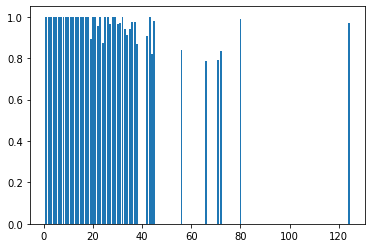

In [39]:
plt.bar(sentence.Length_of_sentence,sentence.Accuracy)

In [38]:
import matplotlib.pyplot as plt


In [34]:
print_confusion_matrix(error.Prediction.values, error.Golden.values)
# print_precision_recall_fscore(error.Prediction.values, error.Golden.values)

Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER     O
Gold                                                                     
B-LOC        192       4     20      3      1       0      0      0    15
B-MISC         5      38      5      1      0       1      0      0     8
B-ORG          5       2     36      5      0       0      0      0    17
B-PER         12      10     33    279      0       0      0      0    67
I-LOC          0       1      0      0     33       0      2      0     8
I-MISC         0       3      1      1      1      26      1      0     4
I-ORG          0       0      5      0      1       0     15      0     4
I-PER          0       1      1      6      0       1      9    209    82
O             15      12     18      8      2       2     15     10  3313


In [66]:
final= pd.read_csv('/Users/hernando/Desktop/NLP/assignment3/interpret_lstm_output/lstm_output_all.tsv', delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8',header=None)
final.columns=['Word','Golden','Prediction']

final

,Word,Golden,Prediction
0,SOCCER,O,O
1,-,O,O
2,JAPAN,B-LOC,O
3,GET,O,O
4,LUCKY,O,O
...,...,...,...
50239,"""",O,O
50240,he,O,O
50241,added,O,O
50242,.,O,O


In [104]:
final_error=final[final['Golden']!=final['Prediction']].dropna().reset_index()

In [105]:
zzz=[(final_error['Golden'][i],final_error['Prediction'][i]) for i in range(len(final_error['Prediction']))]

In [106]:
cs.Counter(zzz) 

Counter({('B-LOC', 'O'): 155,
         ('B-PER', 'O'): 388,
         ('I-PER', 'B-PER'): 50,
         ('B-LOC', 'B-ORG'): 122,
         ('B-LOC', 'B-PER'): 36,
         ('B-MISC', 'O'): 142,
         ('B-PER', 'B-ORG'): 148,
         ('I-PER', 'I-ORG'): 66,
         ('O', 'B-MISC'): 211,
         ('I-PER', 'O'): 330,
         ('B-MISC', 'B-LOC'): 31,
         ('B-MISC', 'B-ORG'): 51,
         ('I-PER', 'B-MISC'): 6,
         ('O', 'B-ORG'): 396,
         ('O', 'B-LOC'): 183,
         ('B-ORG', 'B-MISC'): 79,
         ('B-PER', 'B-LOC'): 70,
         ('B-PER', 'B-MISC'): 44,
         ('I-MISC', 'B-MISC'): 14,
         ('O', 'I-ORG'): 152,
         ('O', 'I-PER'): 56,
         ('O', 'B-PER'): 138,
         ('I-MISC', 'O'): 44,
         ('I-MISC', 'B-ORG'): 6,
         ('B-ORG', 'O'): 344,
         ('O', 'I-MISC'): 82,
         ('B-ORG', 'B-LOC'): 142,
         ('I-ORG', 'O'): 120,
         ('B-ORG', 'B-PER'): 54,
         ('I-ORG', 'B-ORG'): 36,
         ('I-ORG', 'I-LOC'): 32,
         

In [76]:
finalsentence = check_first_assumption(final)

In [77]:
final_result=finalsentence.groupby(['Length_of_sentence']).agg({'Accuracy':'mean'})

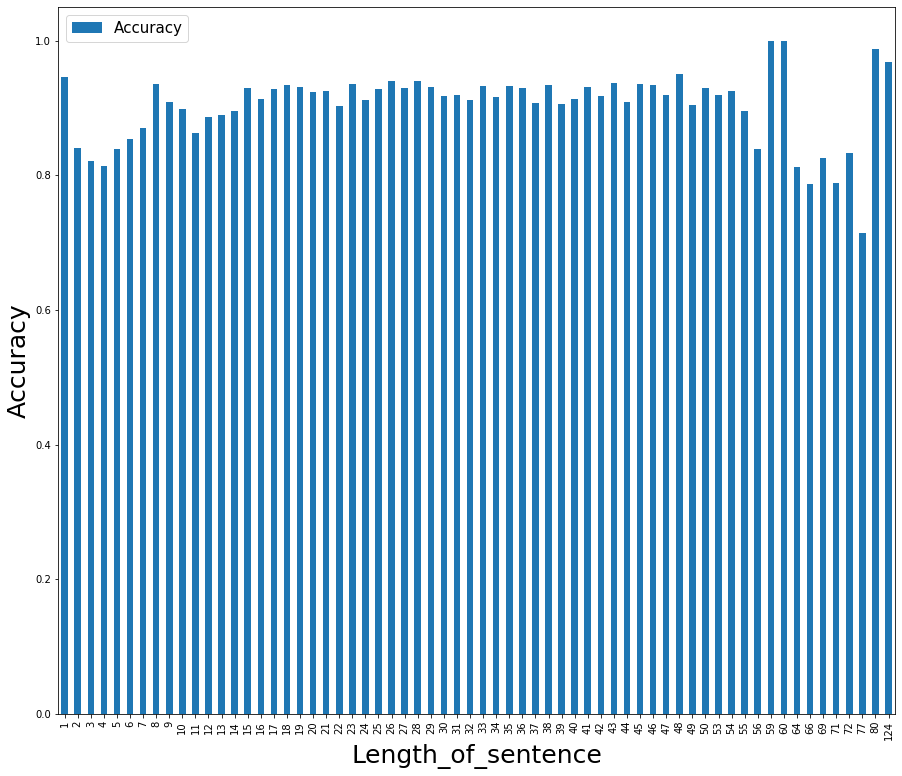

In [81]:
final_result.plot(kind='bar',figsize=(15,13))
plt.xlabel('Length_of_sentence',size=25)
plt.ylabel('Accuracy',size=25)
plt.legend(fontsize=15)
plt.savefig('accuracy_length.png',dpi=200)

In [74]:
def check_second_assumption(error):
    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    
    wrong_name_prediction = name_error[(name_error['Golden']=='B-PER')|(name_error['Golden']=='I-PER')]
    
    print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
    print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
    wrong = 0
    for i in wrong_name_prediction.Word.values:
        if len(i)>5:
            wrong+=1
            
    print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))
            
        
        
    

#     number_of_word = 0
#     number_of_wrong = 0
#     number_of_right = 0
#     for i in range(len(error)):
#         if error['Word'][i] != '----------':
# #             number_of_word_list.append(number_of_word)
# #             number_of_right_list.append(number_of_right)
#             number_of_word += 1
# #         else:
# #             number_of_word +=1
#         if error['Golden'][i] == 'B-PER' and error['Prediction'][i] != 'B-PER':
#             number_of_wrong+=1
#         if error['Golden'][i] == 'I-PER' and error['Prediction'][i] != 'I-PER':
#             number_of_wrong+=1
#         if error['Golden'][i] ==  error['Prediction'][i]:
#             number_of_right+=1
#     sentence=pd.DataFrame(columns=['Length_of_sentence','Correct_prediction','Accuracy'])
#     sentence['Length_of_sentence'] = number_of_word_list
#     sentence['Correct_prediction'] = number_of_right_list
#     sentence['Accuracy'] = sentence['Correct_prediction']/sentence['Length_of_sentence']  
    return 
            

In [75]:
check_second_assumption(final)

Total wrong preidction 4167
Total wrong name preidction 1184
Wrong name prediction percentage 28.413726901847852
Wrong 5 name prediction 693 58.5304054054054


In [145]:
# def check_third_assumption(error):
#     poss = nltk.pos_tag(error.Word.values)
#     poss_list=[]
#     for i in poss:
#         poss_list.append(i[1])
#     error['pos']=poss_list
#     total=0
#     true=0
#     for i in range(len(error)):
#         if error['pos'][i] =='JJ' and error['pos'][i+1] =='NNP':
#             total+=1
#             if error['Golden'][i+1] != error['Prediction'][i+1]:
#                 true +=1
            
            
            
    
#     return total, true
    

In [146]:
# check_third_assumption(final)

(1138, 573)

# adversarial set

In [77]:
final_name =final[(final['Golden']=='B-PER')|(final['Golden']=='I-PER')]

In [79]:
list_name=[]
for i in final_name.Word.values:
    if len(i)<=5:
        list_name.append(i)

In [90]:
import random
random.choices(list_name)[0]

'Frode'

In [82]:
adversarial_example = final.copy()

In [91]:
for i in range(len(adversarial_example)):
    if adversarial_example['Golden'][i]=='B-PER' or adversarial_example['Golden'][i]=='I-PER':
        if len(adversarial_example['Word'][i])>5:
            adversarial_example['Word'][i] = random.choices(list_name)[0]
            

In [92]:
adversarial_example[(adversarial_example['Golden']=='B-PER')|(adversarial_example['Golden']=='I-PER')]

,Word,Golden,Prediction
7,CHINA,B-PER,B-PER
13,Nadim,B-PER,O
14,Ladki,I-PER,B-PER
93,Igor,B-PER,B-ORG
94,Dion,I-PER,I-ORG
...,...,...,...
50114,Peggy,B-PER,O
50130,Dick,B-PER,B-PER
50131,Dejan,I-PER,I-PER
50142,de,B-PER,B-LOC


In [94]:
final[(final['Golden']=='B-PER')|(final['Golden']=='I-PER')]

,Word,Golden,Prediction
7,CHINA,B-PER,B-PER
13,Nadim,B-PER,O
14,Ladki,I-PER,B-PER
93,Igor,B-PER,B-ORG
94,Shkvyrin,I-PER,I-ORG
...,...,...,...
50114,Peggy,B-PER,O
50130,Dick,B-PER,B-PER
50131,Spring,I-PER,I-PER
50142,Charlton,B-PER,B-LOC


In [96]:
adversarial_example[["Word"]].to_csv("adversarial_example.csv", index=False)